In [1]:
from Dijkstra_module import dijkstra
import numpy as np
import matplotlib.pyplot as plt
import noise
from mapping import generar_mundo
import mapping as mp
from matplotlib.colors import ListedColormap

G = np.array([
    [0, 3, 9, 0, 0, 0, 0],
    [0, 0, 0, 7, 1, 0, 0],
    [0, 2, 0, 7, 0, 0, 0],
    [0, 0, 0, 0, 0, 2, 8],
    [0, 0, 4, 5, 0, 9, 0],
    [0, 0, 0, 0, 0, 0, 4],
    [0, 0, 0, 0, 0, 0, 0],
    ])
G =G.astype(float)
dijkstra(G,0,6)

(15.0, [6, 5, 3, 4, 1, 0])

In [2]:
# Sistema de información
# Diseño óptimo de ruta para línea de transmisión
import numpy as np
from mapping import mostrar_mapa
from mapping import generar_mundo
from mapping import crear_bosques
from mapping import crear_hidrico
from mapping import crear_microzonas
from mapping import crear_pendientes
from mapping import crear_vial
import pandas as pd

# Micro áreas
h = 1 # alto km
w = 1 # ancho km

# tamaño de la zona en áreas 
H = 100 # alto km
W = 100 # ancho km

shape = np.array((H,W))
scale = (H*w + W*h)/(2*w*h)

# Costos
"""
Se contemplan los costos en unidades $/km 
Sobre este costo operan los siguientes factores
"""
costo_bosque =      100000  # US$/km
costo_pendiente =   100000  # US$/km
costo_distancia =   100000  # US$/km
costo_vias =        100000  # US$/km
costo_hidrico =     100000  # US$/km

world = generar_mundo(H, W, scale, 6, 0.5, 2.0,2023)
zacti,cmap_acti = crear_microzonas(world, shape, 0.55)
zbosq,cmap_bosq = crear_bosques(world, zacti)
zpend,cmap_pend = crear_pendientes(world, zacti)
zhidr,cmap_hidr = crear_hidrico(world, zacti)
zvias,cmap_vias = crear_vial(world, zacti,1)

zacti = zacti.astype(int)
zbosq = zbosq.astype(int)
zpend = zpend.astype(int)
zhidr = zhidr.astype(int)
zvias = zvias.astype(int)

FCost_Zbosq = [1, 0.5, 0]
FCost_Zvia = [0, 0.5, 0.8, 2, 4]
FCost_Zpend = [1, 0.3, 0.2]
FCost_Zhidr = [1, 0.5, 0.2]

rows, cols = np.where(zacti)

pos = np.where(zacti)


In [29]:
pos = np.flatnonzero(zacti)

NumMicroAreas = pos.size
NumColumnas = W//w
NumFilas = H//h

MapaMicroAreaActiva = np.column_stack(
    (np.arange(0, NumMicroAreas), pos, rows, cols)
)

MicroArea_Ini = np.flatnonzero(zacti == 2)
MicroArea_Fin = np.flatnonzero(zacti == 3)

puntoini = np.flatnonzero(MapaMicroAreaActiva[:,1] == MicroArea_Ini)
puntoini,MicroArea_Ini

(array([1922]), array([3612]))

In [3]:
# for i in range(100):
#     world = generar_mundo(H, W, scale, 6, 0.5, 3.0,np.random.randint(0,2000))
#     zacti,cmap_acti = crear_microzonas(world, shape, 0.55)
#     zbosq,cmap_bosq = crear_bosques(world, zacti)
#     zpend,cmap_pend = crear_pendientes(world, zacti)
#     zhidr,cmap_hidr = crear_hidrico(world, zacti)
#     zvias,cmap_vias = crear_vial(world, zacti,1)    

#     dfworld=pd.DataFrame(world)
#     dfzacti=pd.DataFrame(zacti)
#     dfzbosq=pd.DataFrame(zbosq)
#     dfzpend=pd.DataFrame(zpend)
#     dfzhidr=pd.DataFrame(zhidr)
#     dfzvias=pd.DataFrame(zvias) 

#     writer = pd.ExcelWriter(f'mapa{i}.xlsx', engine='xlsxwriter')    

#     dfzacti.to_excel(writer, sheet_name='acti',index=False, header=False)
#     dfzbosq.to_excel(writer, sheet_name='bosq',index=False, header=False)
#     dfzpend.to_excel(writer, sheet_name='pend',index=False, header=False)
#     dfzhidr.to_excel(writer, sheet_name='hidr',index=False, header=False)
#     dfzvias.to_excel(writer, sheet_name='vias',index=False, header=False)
#     dfworld.to_excel(writer, sheet_name='world',index=False, header=False)  

#     writer.save()

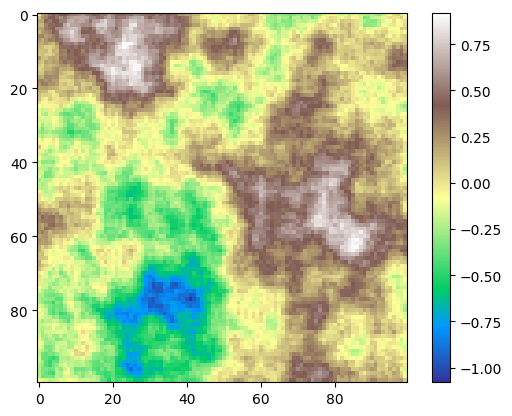

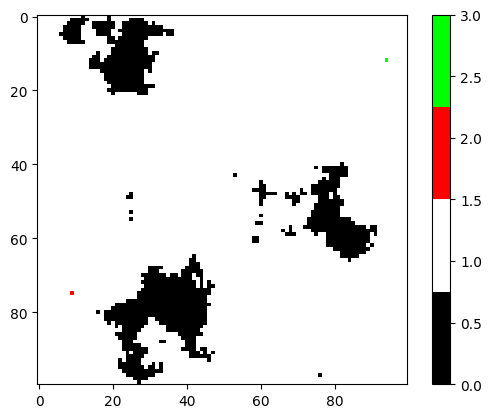

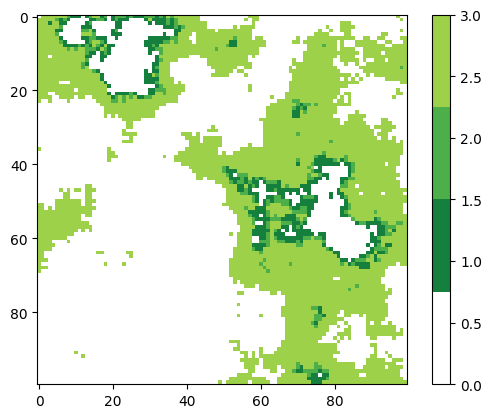

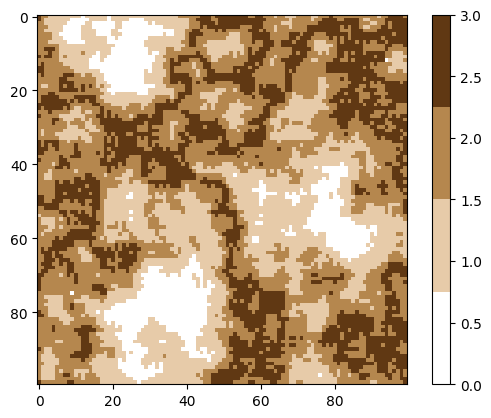

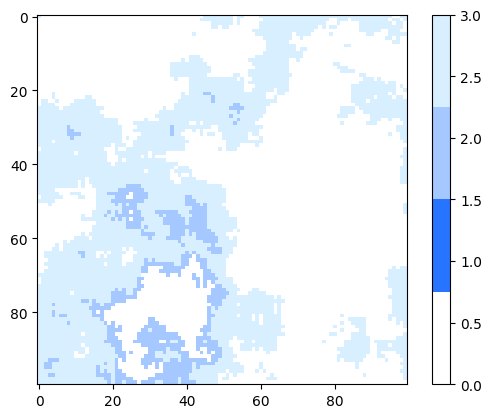

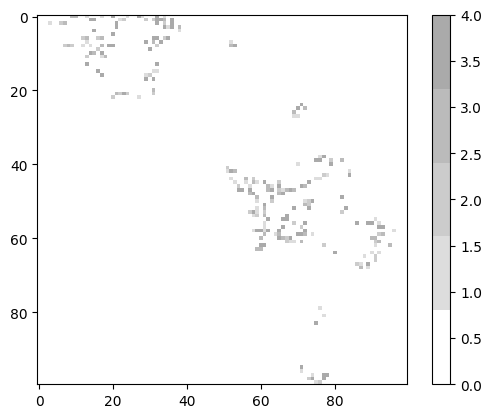

In [3]:
world = generar_mundo(100,100, 50, 6, 0.5, 3,2023)
zacti,cmap_acti = crear_microzonas(world, shape, 0.6)
zbosq,cmap_bosq = crear_bosques(world, zacti)
zpend,cmap_pend = crear_pendientes(world, zacti)
zhidr,cmap_hidr = crear_hidrico(world, zacti)
zvias,cmap_vias = crear_vial(world, zacti,1)

dfworld=pd.DataFrame(world)
dfzacti=pd.DataFrame(zacti)
dfzbosq=pd.DataFrame(zbosq)
dfzpend=pd.DataFrame(zpend)
dfzhidr=pd.DataFrame(zhidr)
dfzvias=pd.DataFrame(zvias)

writer = pd.ExcelWriter('mapaini.xlsx', engine='xlsxwriter')

dfzacti.to_excel(writer, sheet_name='acti',index=False, header=False)
dfzbosq.to_excel(writer, sheet_name='bosq',index=False, header=False)
dfzpend.to_excel(writer, sheet_name='pend',index=False, header=False)
dfzhidr.to_excel(writer, sheet_name='hidr',index=False, header=False)
dfzvias.to_excel(writer, sheet_name='vias',index=False, header=False)
dfworld.to_excel(writer, sheet_name='world',index=False, header=False)

writer.save()
mostrar_mapa(world,'terrain')
mostrar_mapa(zacti,cmap_acti)
mostrar_mapa(zbosq,cmap_bosq)
mostrar_mapa(zpend,cmap_pend)
mostrar_mapa(zhidr,cmap_hidr)
mostrar_mapa(zvias,cmap_vias)

In [1]:
import numpy as np
import pandas as pd

h = 1
w = 1
H = 100
W = 100

CostoBosque = 1000000
CostoPendiente = 100000
CostoDistancia = 100000
CostoVias = 400000

filename = './Mapasv1.xlsx'
ZonasActivas = 'MicroAreas Activas'
Zacti = pd.read_excel(filename, sheet_name=ZonasActivas,header=None).to_numpy()
ZonasBosque = 'Bosque'
Zbosq = pd.read_excel(filename, sheet_name=ZonasBosque,header=None).to_numpy()
ZonasPendiente = 'Pendiente'
Zpend = pd.read_excel(filename, sheet_name=ZonasPendiente,header=None).to_numpy()

ZonasVias = 'Vias'
Zvias = pd.read_excel(filename, sheet_name=ZonasVias,header=None).to_numpy()

FCost_Zbosq = [1, 0.5, 0]
FCost_Zvia = [0, 0.5, 0.8, 2, 4]
FCost_Zpend = [1, 0.3, 0.2]



/home/dancastarod/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/home/dancastarod/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/home/dancastarod/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [5]:
rows,cols = np.where(Zacti)
pos = np.ravel_multi_index((rows, cols),(100,100))
NumMicroAreas = pos.shape[0]
NumColumnas = W/w
NumFilas = H/h
MapaMicroAreaActiva = np.array([np.arange(0,NumMicroAreas),pos,rows,cols]).T

MicroAreaIni = np.argwhere(Zacti == 2)


In [13]:
import numpy as np
import pandas as pd
from scipy.sparse.csgraph import dijkstra
from math import sqrt

h=1
w=1

H=100
W=100

CostoBosque= 1000000
CostoPendiente=100000
CostoDistancia=100000
CostoVias=400000

filename='mapaini.xlsx'
Zacti = pd.read_excel(filename, sheet_name='acti').to_numpy()
Zbosq = pd.read_excel(filename, sheet_name='bosq').to_numpy()
Zpend = pd.read_excel(filename, sheet_name='pend').to_numpy()
Zvias = pd.read_excel(filename, sheet_name='vias').to_numpy()

FCost_Zbosq=[1, 0.5, 0]
FCost_Zvia=[0, 0.5, 0.8, 2, 4]
FCost_Zpend=[1, 0.3, 0.2]

(rows,cols) = np.where(Zacti)
pos=np.flatnonzero(Zacti)
NumMicroAreas=pos.size
NumColumnas=W//w
NumFilas=H//h

MapaMicroAreaActiva=np.column_stack((np.arange(1,NumMicroAreas+1), pos, rows, cols))

MicroAreaIni=np.flatnonzero(Zacti==2)
MicroAreaFin=np.flatnonzero(Zacti==3)

PuntoIni=np.flatnonzero(MapaMicroAreaActiva[:,1]==MicroAreaIni[0])
PuntoFin=np.flatnonzero(MapaMicroAreaActiva[:,1]==MicroAreaFin[0])

MapaVecinosMicroAreas=np.zeros((NumMicroAreas, 8), dtype=int)
MapaVecinoDiagonales=np.zeros((NumMicroAreas, 8), dtype=int)

for i in range(NumMicroAreas):
    X=MapaMicroAreaActiva[i,1]
    ConsiderarLimitesAbajo=False
    ConsiderarLimitesArriba=False
    if MapaMicroAreaActiva[i,2]==NumFilas-1:
        ConsiderarLimitesAbajo=True
    if MapaMicroAreaActiva[i,2]==0:
        ConsiderarLimitesArriba=True

    contador=0
    cont_i=-1
    Lim_m=3
    Lim_n=3
    for m in range(Lim_m):
        if ConsiderarLimitesArriba:
            Vecino=X+cont_i*NumFilas
            Lim_n=2
        else:
            Vecino=X+cont_i*NumFilas-1
        cont_i=cont_i+1
        cont_j=0
        if ConsiderarLimitesAbajo:
            Lim_n=2
        for n in range(Lim_n):
            Vecino=Vecino+cont_j
            cont_j=1
            if Vecino!=X:
                PosVecino=np.flatnonzero(MapaMicroAreaActiva[:,1]==Vecino)
                if PosVecino.size!=0:
                    contador=contador+1
                    if (m==0 and n==0) or (m==0 and n==2) or (m==2 and n==0) or (m==2 and n==2):
                        MapaVecinoDiagonales[i,contador-1]=1
                    elif (m==0 and n==1) or (m==2 and n==1):
                        MapaVecinoDiagonales[i,contador-1]=2
                    else:
                        MapaVecinoDiagonales[i,contador-1]=3
                    MapaVecinosMicroAreas[i,contador-1]=PosVecino[0]

AdyPonderaciones=np.zeros((NumMicroAreas,NumMicroAreas))

for MicroArea in range(NumMicroAreas):
    for v in range(8):
        Vecino=MapaVecinosMicroAreas[MicroArea,v]
        if Vecino==0:
            break

        if MapaVecinoDiagonales[MicroArea,v]==1:
            FDistancia=sqrt(h**2+w**2)
        elif MapaVecinoDiagonales[MicroArea,v]==2:
            FDistancia=w
        elif MapaVecinoDiagonales[MicroArea,v]==3:
            FDistancia=h
        CostoTramoDistancia=CostoDistancia*FDistancia

        TipoBosqueMicroArea_i= Zbosq.flat[MapaMicroAreaActiva[MicroArea, 1]]
        Fbosque_i=0 if TipoBosqueMicroArea_i==0 else FCost_Zbosq[TipoBosqueMicroArea_i-1]
        TipoBosqueMicroArea_j= Zbosq.flat[MapaMicroAreaActiva[Vecino, 1]]
        Fbosque_j=0 if TipoBosqueMicroArea_j==0 else FCost_Zbosq[TipoBosqueMicroArea_j-1]
        CostoTramoBosque=(Fbosque_i+Fbosque_j)*FDistancia/2*CostoBosque

        TipoViaMicroArea_i= Zvias.flat[MapaMicroAreaActiva[MicroArea, 1]]
        Fvia_i=0 if TipoViaMicroArea_i==0 else FCost_Zvia[TipoViaMicroArea_i-1]
        TipoViaMicroArea_j= Zvias.flat[MapaMicroAreaActiva[Vecino, 1]]
        Fvia_j=0 if TipoViaMicroArea_j==0 else FCost_Zvia[TipoViaMicroArea_j-1]
        CostoTramoVia=(Fvia_i+Fvia_j)*FDistancia/2*CostoVias

        TipoPendMicroArea_i= Zpend.flat[MapaMicroAreaActiva[MicroArea, 1]]
        Fpend_i=0 if TipoPendMicroArea_i==0 else FCost_Zpend[TipoPendMicroArea_i-1]
        TipoPendMicroArea_j= Zpend.flat[MapaMicroAreaActiva[Vecino, 1]]
        Fpend_j=0 if TipoPendMicroArea_j==0 else FCost_Zpend[TipoPendMicroArea_j-1]
        CostoTramoPendiente=(Fpend_i+Fpend_j)*FDistancia/2*CostoPendiente

        AdyPonderaciones[MicroArea, Vecino]=CostoTramoDistancia + CostoTramoBosque + CostoTramoPendiente + CostoTramoVia
import numpy as np

# Valor máximo representable de float64
max_float = np.finfo(np.float64).max

# Reemplaza los valores infinitos con el valor máximo representable
AdyPonderaciones[AdyPonderaciones == float('inf')] = max_float

[e, L] = dijkstra(AdyPonderaciones, indices=[PuntoIni[0], PuntoFin[0]], return_predecessors=False)






array([              inf,  2045843.07141212,  2012497.83362056, ...,
       11212705.98642227, 11176787.1555019 , 11142081.52801713])

In [25]:
MatSol=np.zeros((NumFilas,NumColumnas))
for i in range(L.size):
    Pos=int(L[i])
    print(e[i])
    # fila=MapaMicroAreaActiva[Pos,2]
    # columna=MapaMicroAreaActiva[Pos,3]
    # MatSol[fila,columna]=1


1.7976931348623157e+308
9801284.63018496
9767939.392393399
9850782.104868017
9926579.00270019
10259421.71517481
10799371.208835976
11749371.208835976
12699371.208835976
15156660.88965482
15715849.1988585
17065849.1988585
17765849.1988585
18715849.1988585
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
20480661.966467313
18739240.610230003
17580661.966467313
15696275.964667186
14685687.219636729
13335687.219636729
11612895.013500944
11059341.622907668
10976498.91043305
10831707.063234765
10728361.825443204
10768067.452927977
10812773.08041275
10842478.707897522
10892184.335382294
10941889.962867066
11024879.8615993
11076656.556895938
11151717.523440037
11201423.15092481
11251128.778409582
11371128.778409582
11491128.778409582
11611128.778409582
11731128.778409582
11851128.778409582
11910783.89955552
11903687.57857424
11824865.068635155
11709007.204258885
11655159.44115